In [1]:
import jieba as jb

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import re

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif' #解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

1、	读取政府报告文件zfbg.txt， 绘制词云图，以beijing.jpg为背景，去掉“的、了”。

In [5]:
with open('./zfbg.txt', encoding = 'utf-8') as f:
    data = f.read() 

In [6]:
data = data.replace('的','') 
data = data.replace('了','')

In [7]:
text = jb.cut(data, cut_all = False) 
new_text = '|'.join(text) 

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.558 seconds.
Prefix dict has been built successfully.


In [19]:
from imageio import imread

In [20]:
from wordcloud import WordCloud

In [21]:
image = imread("./beijing.jpg")

In [22]:
wordcloud=WordCloud(font_path ='msyh.ttc',background_color='white',mask=image).generate(new_text)

(-0.5, 499.5, 523.5, -0.5)

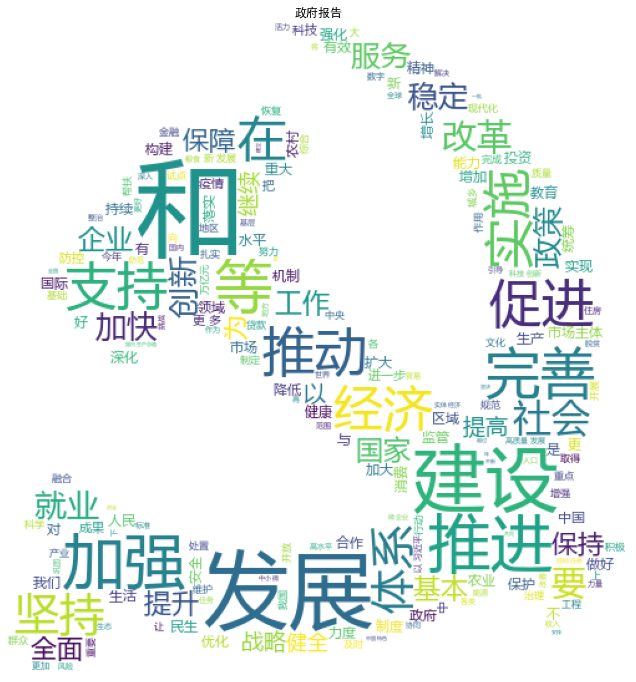

In [23]:
plt.figure(figsize = (12, 12)) 
plt.title('政府报告')
plt.imshow(wordcloud) 
plt.axis('off')

2、统计排名前10的词出现的次数，横排柱状图。

In [24]:
import pandas as pd

In [32]:
from zhon.hanzi import punctuation

In [34]:
from collections import Counter

In [37]:
import numpy as np 

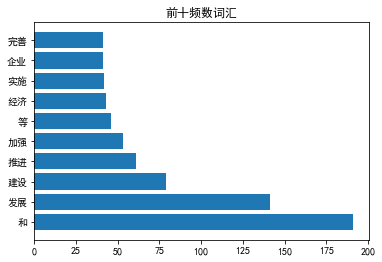

In [45]:
words = new_text.split('|')
while '\n' in words:
    words.remove('\n')
for x in words:
    if (x in punctuation):
        words.remove(x) 

d = dict(Counter(words)) 
sort_words = sorted(d.items(), key = lambda x : x[1], reverse = True)

words_top10 = sort_words[0:10]
result = np.array(words_top10)

plt.barh(a[:, 0], result[:, 1].astype('int')) 
plt.title('前十频数词汇')
plt.show()